<a href="https://colab.research.google.com/github/Abhishek2104200/TechnoHacks/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer Vision: Image Classification of CIFAR-10 dataset using TensorFlow

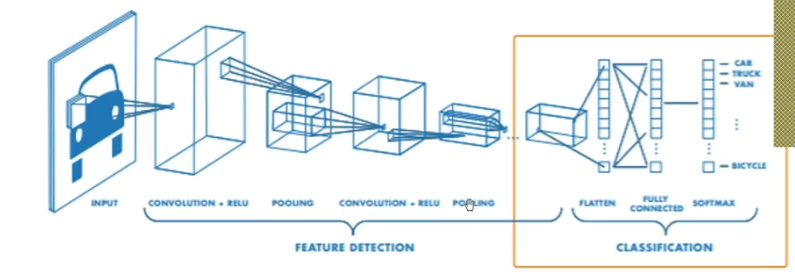

In [8]:
from IPython.display import Image
Image("/Cifar10 1.png")

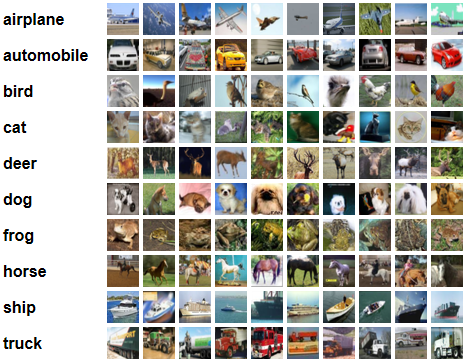

In [9]:
Image("/CiFAR10 Examples.png")

# Importing packages

In [10]:
# importing tensorflow and keras

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.utils import to_categorical, plot_model

In [11]:
# Printing version of the TensorFlow

print(tf.__version__)

2.15.0


# Loading the Dataset

In [12]:
# Loading the dataset

Cifar10=keras.datasets.cifar10
(xtrain,ytrain),(xtest,ytest)= Cifar10.load_data()
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)
print(ytrain)



170498071/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)
[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


Observations:
* There are 60,000 images. We assigned 10,000 to test dataset
* Images are black and white and is of 32 x 32 pixels
* Train Images: Array of 60,000 images in 32 X 32 pixel
* Train Labels: Integer array of 60,000 labels, value between 0 to 9
* Test Images: Array of 10,000 images in 32 X 32 pixel
* Test Labels: Integer array of 10,000 labels, value between 0 to 9
* Each image mapped to a single label
* Each integer value in label array represent clothing item

In [13]:
# Defining array.

class_names =['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
print(class_names)

['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']


# Evaluation of the data

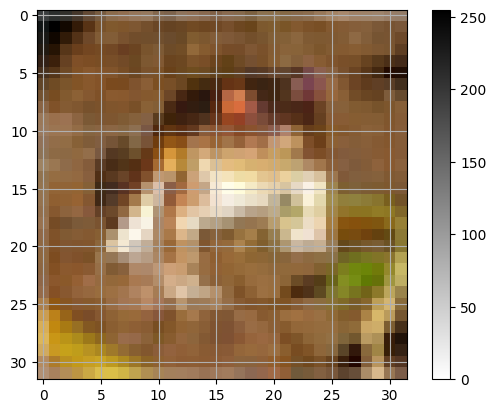

Class ID: [6] and Class name: Frog


In [14]:
# inspect the data in the array

index=0
plt.imshow(xtrain[index], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(True)
plt.show()
print("Class ID: %s and Class name: %s" % (ytrain[index], class_names[ytrain[index][0]]))

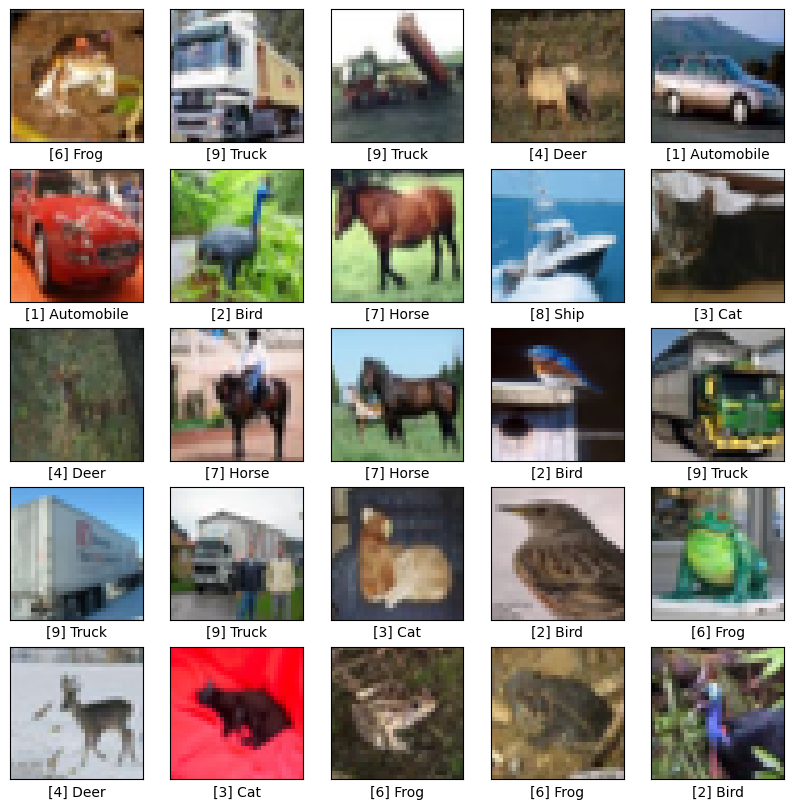

In [15]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(xtrain[i], cmap=plt.cm.binary)
  plt.xlabel("%s %s" % (ytrain[i], class_names[ytrain[i][0]]))
plt.show()

# Data Preparation

## Scaling the image values

In [16]:

xtrain = xtrain/255
print(xtrain.shape)

xtest = xtest/255
print(xtest.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


## One hot encoding of the labels


In [17]:
print("ytrain Shape: %s and value: %s" % (ytrain.shape, ytrain))
print("ytest Shape: %s and value: %s" % (ytest.shape, ytest))

ytrain=to_categorical(ytrain)
ytest=to_categorical(ytest)

# After one hot encoding
print("ytrain Shape: %s and value: %s" % (ytrain.shape, ytrain[0]))
print("ytest Shape: %s and value: %s" % (ytest.shape, ytest[1]))

ytrain Shape: (50000, 1) and value: [[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]
ytest Shape: (10000, 1) and value: [[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]
ytrain Shape: (50000, 10) and value: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
ytest Shape: (10000, 10) and value: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


# Modelling - Model on CNN



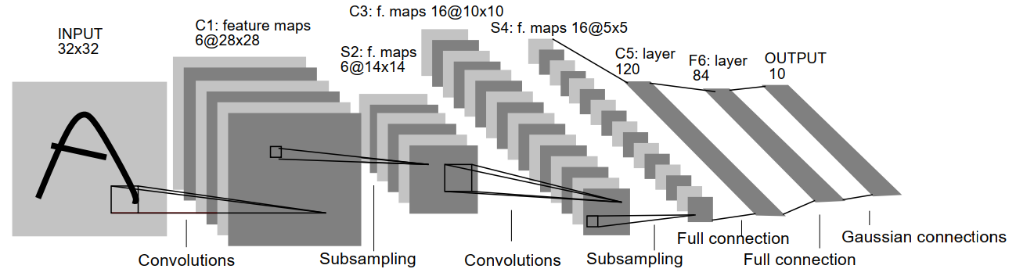

In [18]:
from IPython.display import Image
Image("/Lecun.png")

## Building model

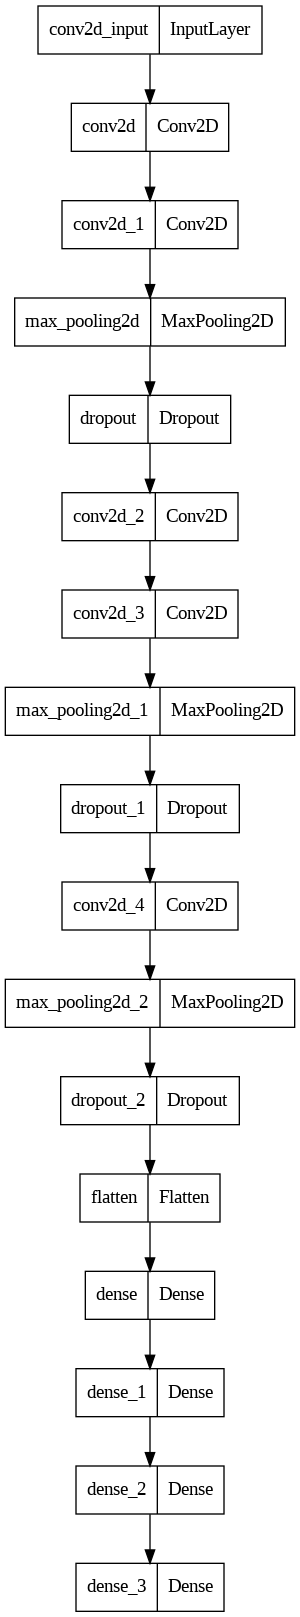

In [19]:
# Modelling - Model on CNN
from tensorflow.keras import models, layers
from keras.layers import Conv2D, MaxPooling2D, Flatten , Dense, Activation,Dropout
model=models.Sequential()
model.add(layers.Conv2D(64,(3,3),input_shape=(32,32,3),activation='relu'))
model.add(layers.Conv2D(64,(3,3),input_shape=(32,32,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(layers.Conv2D(256,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(layers.Flatten(input_shape=(32,32)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(80, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
plot_model(model)

## Compile the model

In [20]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 128)       147584    
                                                        

## Train the model

In [ ]:
# Train the model
xtrain2=xtrain.reshape(50000,32,32,3)
xtest2=xtest.reshape(10000,32,32,3)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)
model.fit(xtrain2,ytrain,epochs=40,batch_size=56,verbose=True,validation_data=(xtest2,ytest))

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 10)
(10000, 10)
Epoch 1/40
483/893 [===============>..............] - ETA: 3:42 - loss: 1.8672 - accuracy: 0.2694

# Evaluation of the model

## Evaluating model accuracy

In [22]:
# evaluate accuracy of the model

test_loss, test_acc = model.evaluate(xtest2, ytest)
print("accuracy:", test_acc)

313/313 [==============================] - 35s 113ms/step - loss: 2.1842 - accuracy: 0.1791
accuracy: 0.17910000681877136


## Predicting label

In [23]:
# predicting lable for test_images

predictions=model.predict(xtest2)
print("1. Prediction array: %s" % (predictions[0]))
print("2. Label number having highest confidence in prediction array: %s" % (np.argmax(predictions[0])))
print("3. Actual label in dataset: %s" % (ytest[0]))

313/313 [==============================] - 27s 86ms/step
1. Prediction array: [0.09702943 0.09572113 0.10167778 0.11265147 0.10453833 0.09559839
 0.11220486 0.10157597 0.09197716 0.08702556]
2. Label number having highest confidence in prediction array: 3
3. Actual label in dataset: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


# Testing the model on data

## Creating a function to verify prediction is True or False

In [24]:
# creating a funtion which will help to verify the prediction is true of not

def plot_image(i, predictions_array, true_label, img):

  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label=np.argmax(predictions_array)
  true_label=np.argmax(true_label)
  if predicted_label == true_label:
    color='blue'
  else:
    color='red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],100*np.max(predictions_array),class_names[true_label]),color=color)
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot=plt.bar(range(10), predictions_array, color='gray')
  plt.ylim([0,1])
  predicted_label=np.argmax(predictions_array)
  true_label=np.argmax(true_label)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')

## Test for single image

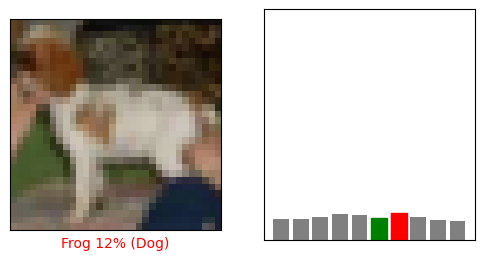

In [25]:
# call the function
i=12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, ytest, xtest)
plt.subplot(1,2,2)
plot_value_array(i, predictions, ytest)
plt.show()

## Test for single image

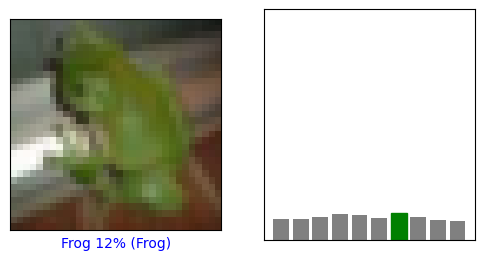

In [26]:
# call the function
i=7
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, ytest, xtest)
plt.subplot(1,2,2)
plot_value_array(i, predictions, ytest)
plt.show()

## Test for single image

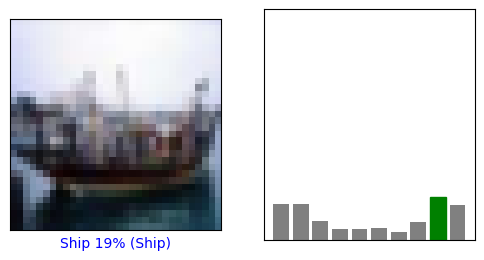

In [27]:
# call the function


i=18 # image number 12. You may change value of i for play around
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, ytest, xtest)
plt.subplot(1,2,2)
plot_value_array(i, predictions, ytest)
plt.show()

(32, 32, 3)
(1, 32, 32, 3)
1/1 [==============================] - 0s 34ms/step
[[0.09380779 0.09188237 0.10063708 0.11499116 0.10972308 0.09529165
  0.11872178 0.10109258 0.08936708 0.08448547]]


6

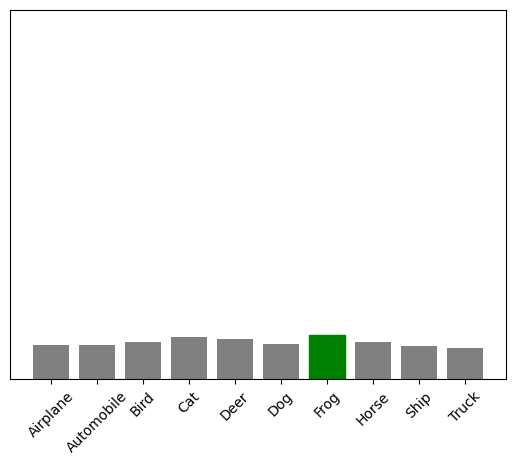

In [28]:


i=4
img = xtest2[i]
print(img.shape)

img=(np.expand_dims(img,0))
print(img.shape)

predictions_single = model.predict(img)
print(predictions_single)

plot_value_array(i, predictions,ytest)
_ = plt.xticks(range(10), class_names,rotation=45)

np.argmax(predictions_single[0])

## Verifying several images

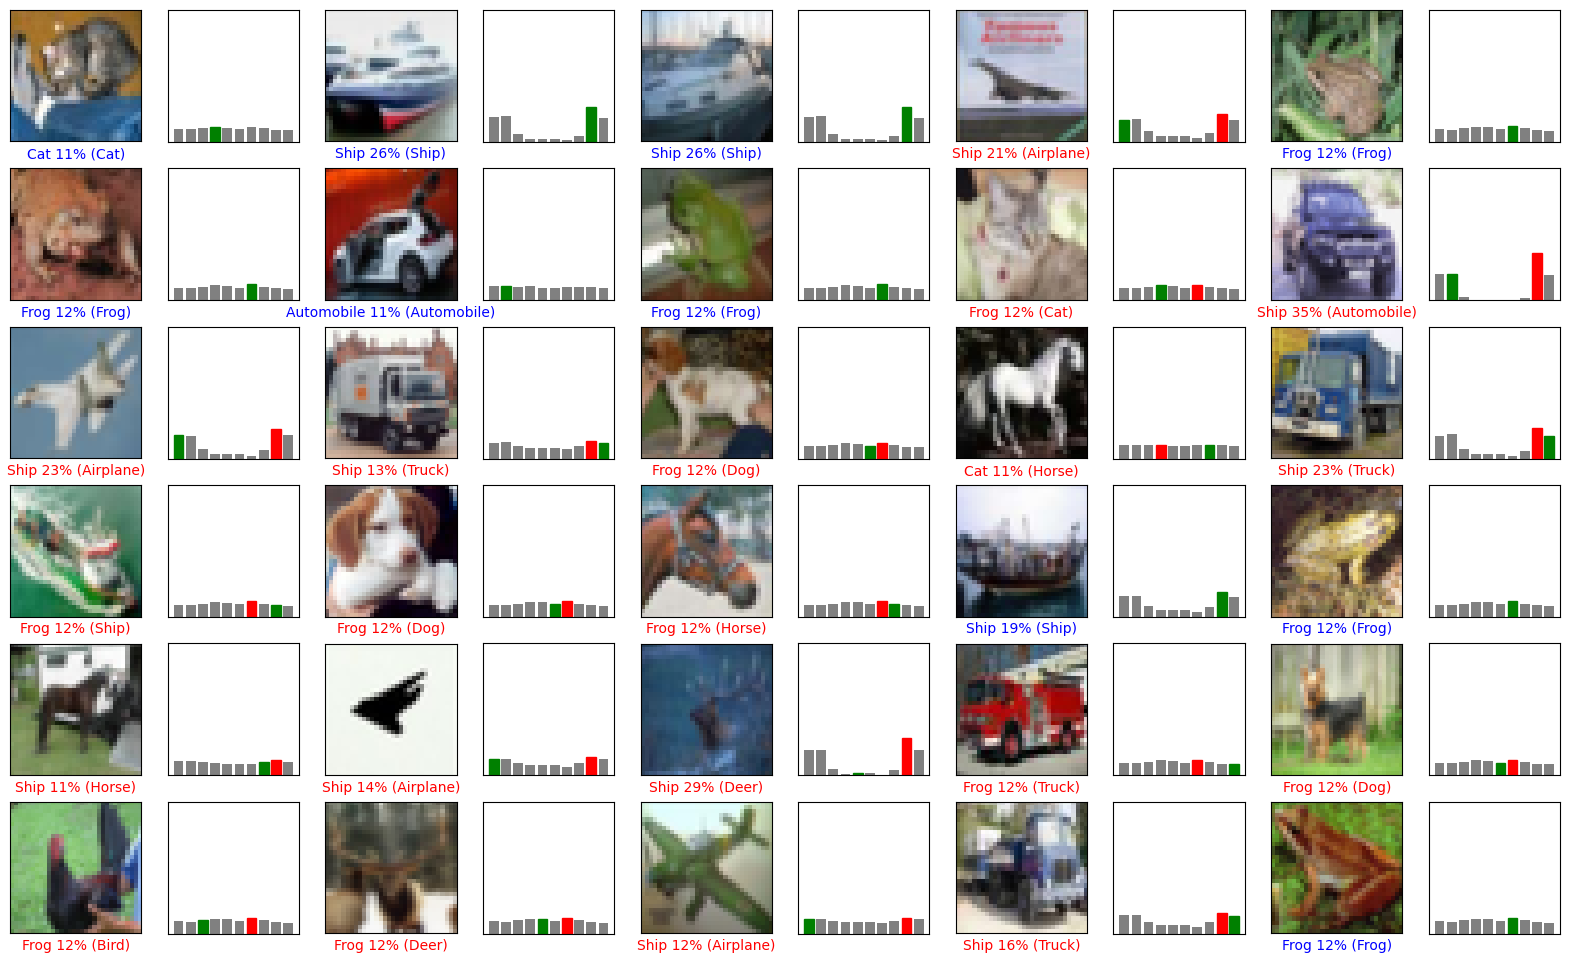

In [29]:
num_rows=6
num_cols=5
num_images=num_rows*num_cols

plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i,predictions, ytest, xtest)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, ytest)
plt.show()